# Python Insights - Data analysis with Python

### Case - Customer cancellation

You have been hired by a company with over 800,000 customers for a Data project.

Recently, the company noticed that most of its customer base consists of inactive clients who have already canceled the service.

To improve results, the company wants to understand the primary reasons for these cancellations and identify the most effective actions to reduce churn.

In [1]:
# Understanding the data
from pandas import read_csv

database = read_csv('../database/cancelamentos.csv')

display(database)
display(database.info())

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,349936.0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,100634.0,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,301263.0,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,119358.0,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,130955.0,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,195680.0,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,43477.0,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,169273.0,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,310693.0,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              50000 non-null  float64
 1   idade                   50000 non-null  float64
 2   sexo                    49997 non-null  object 
 3   tempo_como_cliente      49998 non-null  float64
 4   frequencia_uso          50000 non-null  float64
 5   ligacoes_callcenter     50000 non-null  float64
 6   dias_atraso             50000 non-null  float64
 7   assinatura              50000 non-null  object 
 8   duracao_contrato        50000 non-null  object 
 9   total_gasto             50000 non-null  float64
 10  meses_ultima_interacao  50000 non-null  float64
 11  cancelou                50000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 4.6+ MB


None

I've identified that the dataset contains missing values.

In [2]:
# Data cleaning
database = database.drop(columns='CustomerID')
database = database.dropna()

display(database.info())


<class 'pandas.core.frame.DataFrame'>
Index: 49996 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   49996 non-null  float64
 1   sexo                    49996 non-null  object 
 2   tempo_como_cliente      49996 non-null  float64
 3   frequencia_uso          49996 non-null  float64
 4   ligacoes_callcenter     49996 non-null  float64
 5   dias_atraso             49996 non-null  float64
 6   assinatura              49996 non-null  object 
 7   duracao_contrato        49996 non-null  object 
 8   total_gasto             49996 non-null  float64
 9   meses_ultima_interacao  49996 non-null  float64
 10  cancelou                49996 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.6+ MB


None

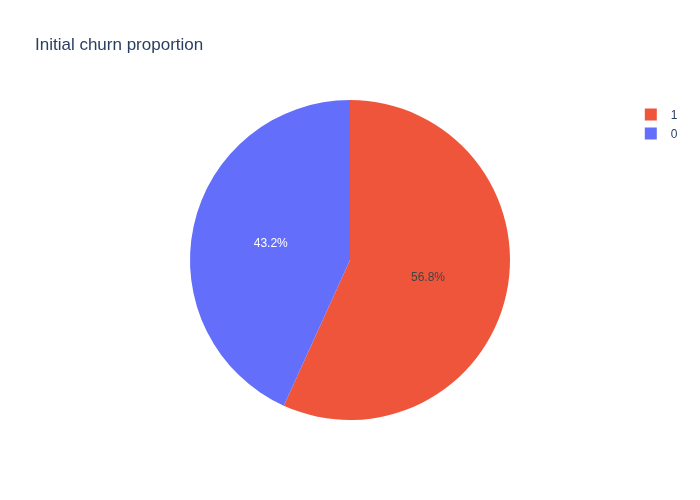

In [3]:
# Identifying churn percents
# 1 = churn | 0 = don't churn
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'png'

chart = px.pie(database, title='Initial churn proportion', names='cancelou', color='cancelou')
chart.show()

While analyzing churn rates, I found that a higher number of customers canceled their plans.

Now, it is important to identify the root causes of churn.  
For this purpose, charts and graphs are crucial to providing a clear overview.

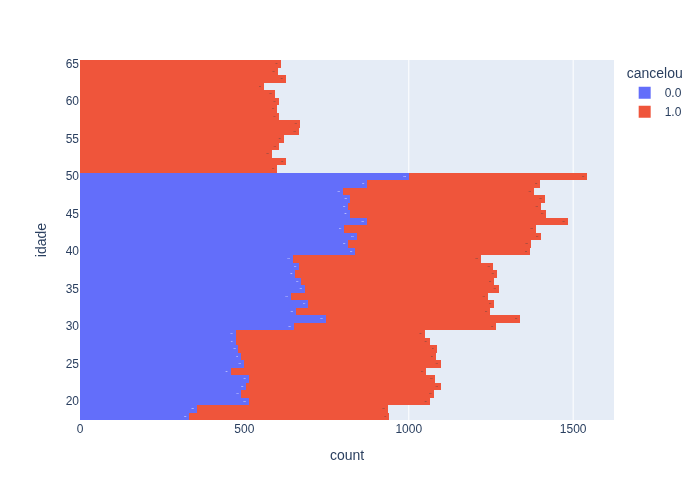

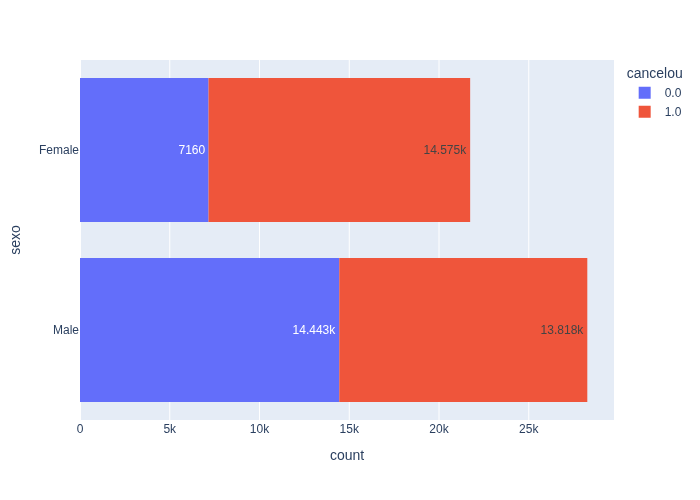

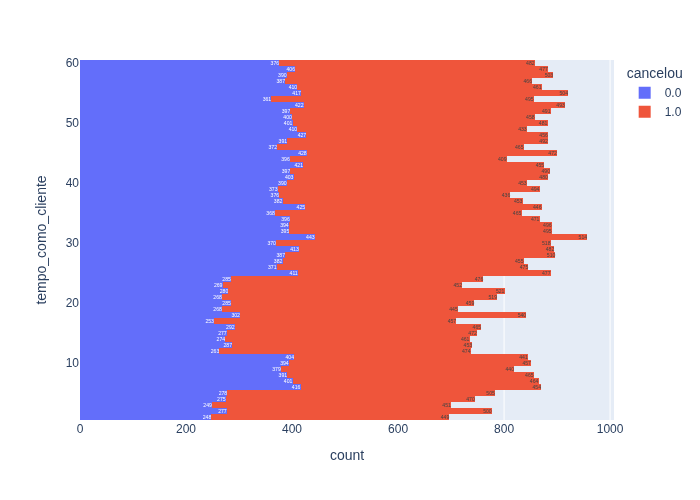

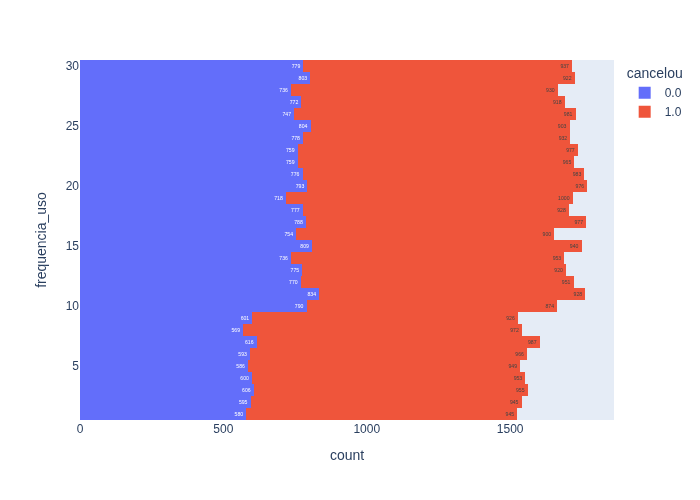

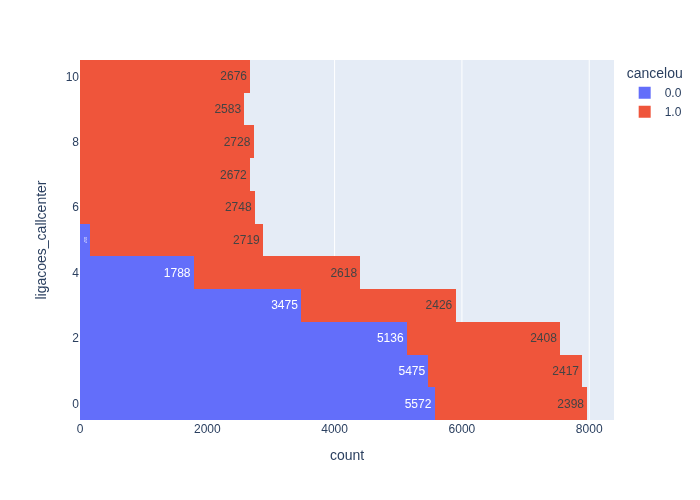

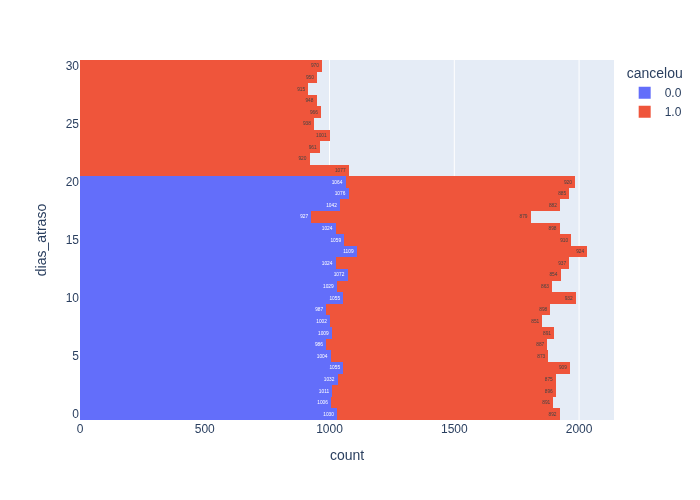

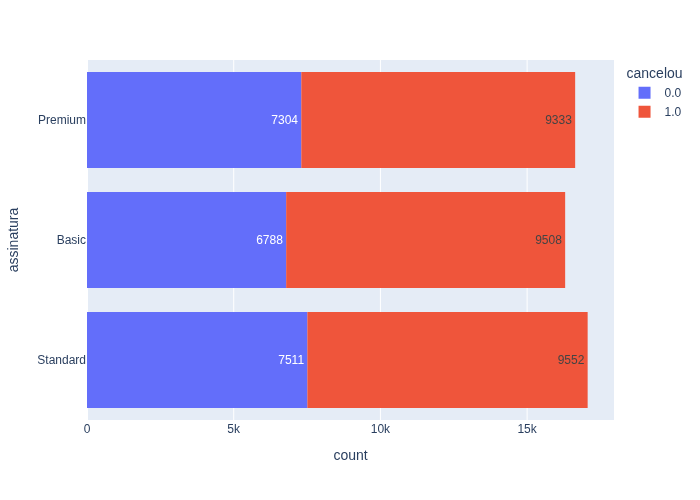

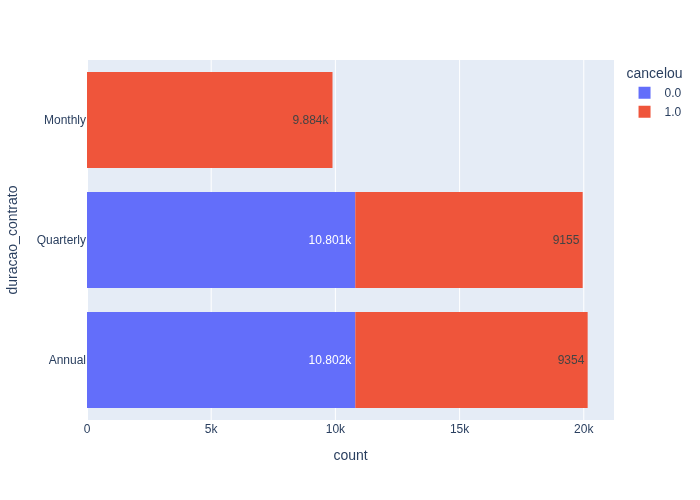

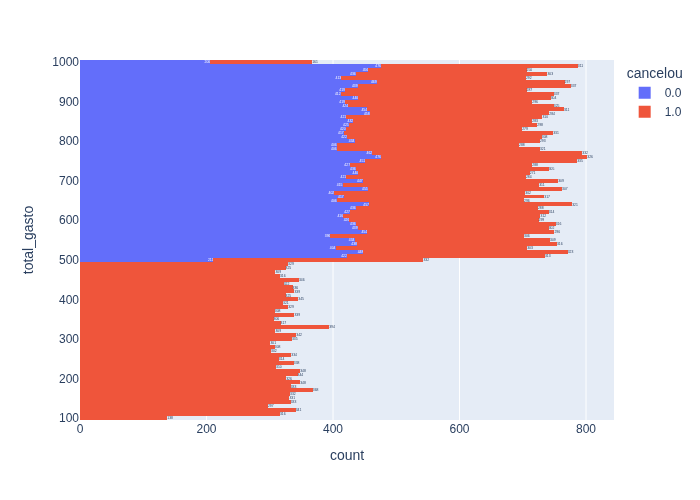

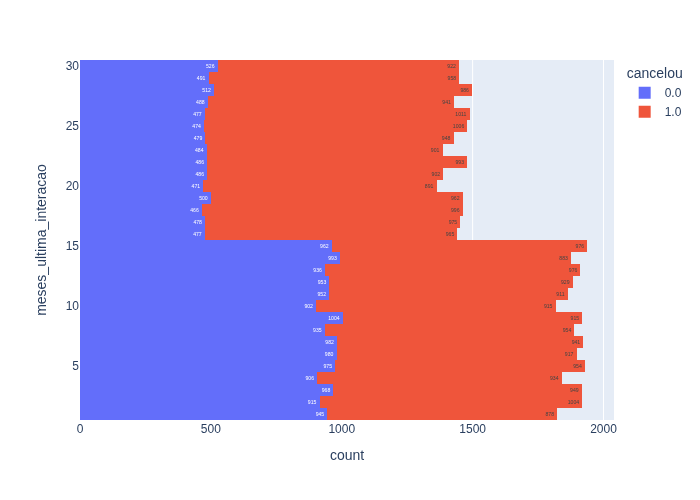

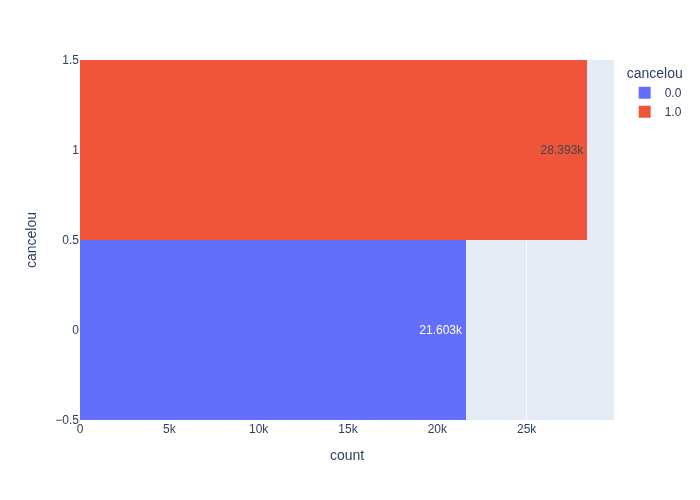

In [4]:
for category in database:
    chart = px.histogram(database, y=category, color='cancelou', text_auto=True)
    chart.show()

# Conclusions
1. More than half of the women have canceled our services.
2. If payment is overdue by more than 20 days, the customer is likely to churn.
3. There is a 100% churn rate among customers on the monthly plan.
4. Customers who call support more than 4 times are highly likely to churn.

# Next Step
By addressing the root causes, we can simulate a new scenario to see how much the retention rate would improve. This allows us to quantify the financial benefit of our proposed actions.

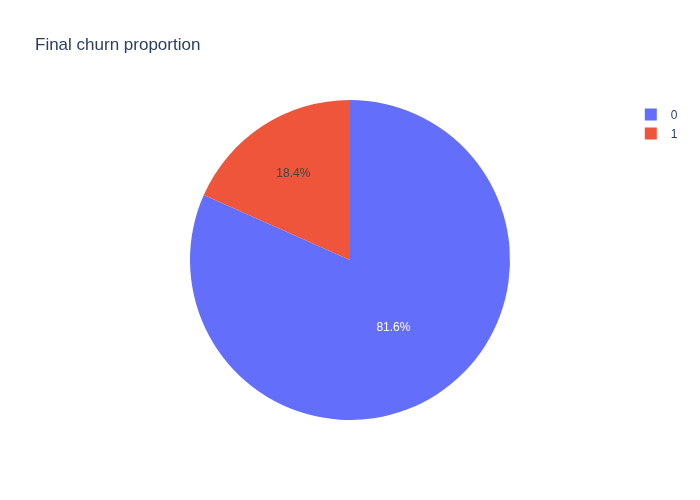

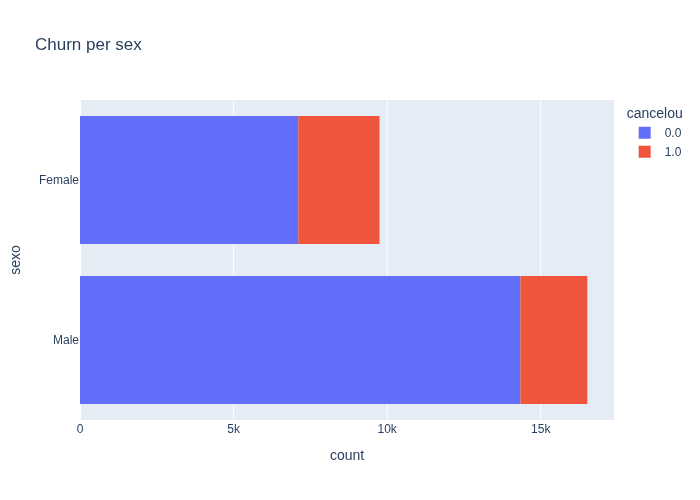

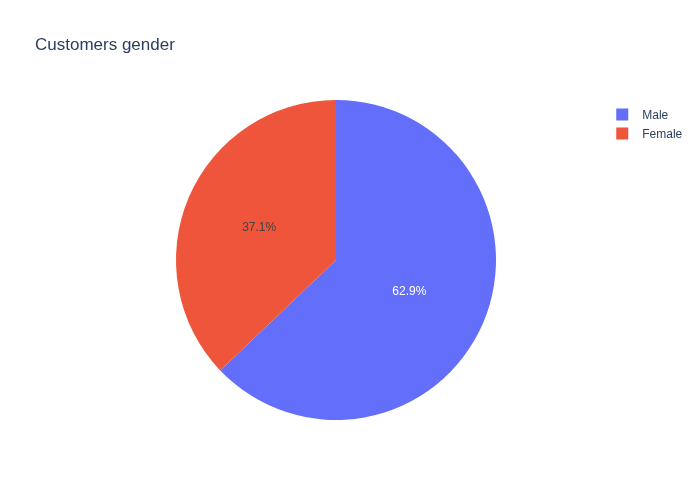

In [5]:
# Solving overdue
database = database[database['dias_atraso'] <= 20]
# Solving calls
database = database[database['ligacoes_callcenter'] <= 4]
# Solving montlhy plan
database = database[database['duracao_contrato'] != 'Monthly']

# Cancel chart
chart = px.pie(database, names='cancelou', color='cancelou', title='Final churn proportion')
chart.show()
# Cancel per sex chart
chart = px.histogram(database, y='sexo', color='cancelou', title='Churn per sex')
chart.show()
# Customers per sex
chart = px.pie(database, names='sexo', color='sexo', title='Customers gender')
chart.show()

# Final Conclusion
In an ideal scenario where problems 2, 3, and 4 are fully mitigated and resolved, the following findings are observed:
1. The churn rate drops significantly from 58% to 18%.
2. The proportion of female churn becomes more aligned with male churn. However, it is noted that only 37% of the total customer base are women, indicating a need for targeted actions to address this male prevalence.